In [5]:
import plotly
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import nltk
from nltk import bigrams
from nltk.corpus import stopwords
import re
import networkx as nx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

import pickle


import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import pickle

import nltk
from nltk.corpus import stopwords
import re

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

pd.options.display.max_columns = None

In [6]:
with open('kp_service_delivery_tweets.pickle', "rb") as f:
    tweets = pickle.load(f)

In [7]:
with open('kp_all_sentiments_translations.pickle', "rb") as f:
    all_tweets = pickle.load(f)

In [9]:
#Create tweet count timeline for all tweets in KP
all_tweets["count"] = 1
all_tweets_count = all_tweets[["datetime", "count"]]
all_tweets_count = all_tweets_count.set_index("datetime")
all_tweets_count = all_tweets_count.resample("M").count()
all_tweets_count = all_tweets_count["2010":"2020"]

In [18]:
#Create a service delivery count and select all columns indicating service delivery category and create datetime dataframe
tweets["overall_count"] = 1
overall_tweets = tweets[["datetime", "user_id", "user_location", "hedonometer", "agriculture_total", "development_total", "education_total", "energy_total", "food_total", "healthcare_total", "internet_total", "natural_resources_total", "sanitation_total", "water_total", "overall_count"]]
by_datetime = overall_tweets[["datetime", "agriculture_total", "development_total", "education_total", "energy_total", "food_total", "healthcare_total", "internet_total", "natural_resources_total", "sanitation_total", "water_total", "overall_count"]]
by_datetime = by_datetime.set_index("datetime")
by_datetime = by_datetime.resample("M").count()
by_datetime = by_datetime["2010":"2020"]

In [19]:
#Merge all tweet dataframe with service delivery dataframe
by_datetime = by_datetime.merge(all_tweets_count, left_index=True, right_index=True)

In [ ]:
#Calculate percent of tweets in each service delivery sub-category

In [27]:
by_datetime["agriculture_percent"] = (by_datetime["agriculture_total"]/by_datetime["count"])*100

In [28]:
by_datetime["development_percent"] = (by_datetime["development_total"]/by_datetime["count"])*100

In [29]:
by_datetime["education_percent"] = (by_datetime["education_total"]/by_datetime["count"])*100

In [30]:
by_datetime["energy_percent"] = (by_datetime["energy_total"]/by_datetime["count"])*100

In [31]:
by_datetime["food_percent"] = (by_datetime["food_total"]/by_datetime["count"])*100

In [32]:
by_datetime["healthcare_percent"] = (by_datetime["healthcare_total"]/by_datetime["count"])*100

In [33]:
by_datetime["internet_percent"] = (by_datetime["internet_total"]/by_datetime["count"])*100

In [34]:
by_datetime["natural_resources_percent"] = (by_datetime["natural_resources_total"]/by_datetime["count"])*100

In [35]:
by_datetime["sanitation_percent"] = (by_datetime["sanitation_total"]/by_datetime["count"])*100

In [36]:
by_datetime["water_percent"] = (by_datetime["water_total"]/by_datetime["count"])*100

In [37]:
by_datetime["energy_percent"] = (by_datetime["energy_total"]/by_datetime["count"])*100

In [38]:
#Create dataframe of these percentages
by_datetime_percent = by_datetime[["agriculture_percent", "development_percent", "education_percent", "energy_percent", "food_percent", "healthcare_percent", "internet_percent", "natural_resources_percent", "sanitation_percent", "water_percent"]]
by_datetime_percent = by_datetime_percent.dropna()
by_datetime_percent = by_datetime_percent.resample("6M").mean()
by_datetime_percent = by_datetime_percent["2012":]

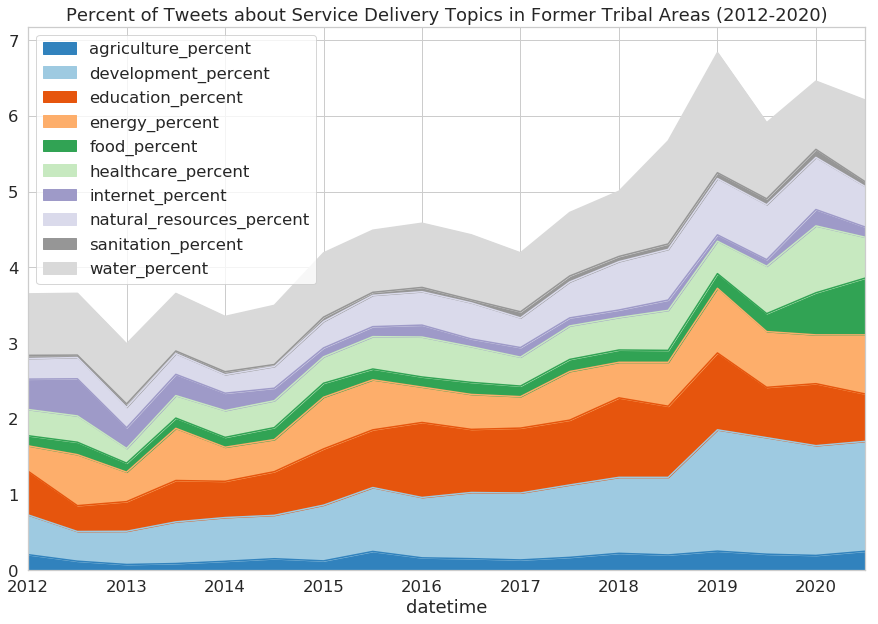

In [47]:
#Plot distribution of service delivery categories over time
plt.get_cmap(name="tab20c", lut=None)

by_datetime_percent.plot.area(figsize = [15,10], title="Percent of Tweets about Service Delivery Topics in Former Tribal Areas (2012-2020)", colormap="tab20c")

plt.legend(loc=2)

plt.savefig("Percent of Tweets about Service Delivery Topics in Former Tribal Areas (2012-2020).pdf", dpi=300, bbox_inches ="tight", transparent=True)

In [64]:
#Create dataframe with number of all kp users over time
all_users = all_tweets[["datetime", "user_id"]]
all_users = all_users.set_index("datetime")
all_users = all_users.resample("M").nunique()
all_users = all_users['2009-01-31' :'2020-03-31']

In [65]:
#Create dataframe with number of users tweeting about service delivery over time
users = tweets[["datetime", "user_id"]]
users = users.set_index("datetime")
users = users.resample("M").nunique()
users = users['2009-01-31' :'2020-03-31']

In [100]:
#Merge all users and kp users and create new df to plot percent of users over time tweeting about service delivery
users = users.merge(all_users, left_index = True, right_index = True)
users = users.resample("6M").sum()
users.columns = ["users", "total_users"]
users["norm"] = (users["users"]/users["total_users"])*100
plot = users["2011-05-30":"2020-05-30"]

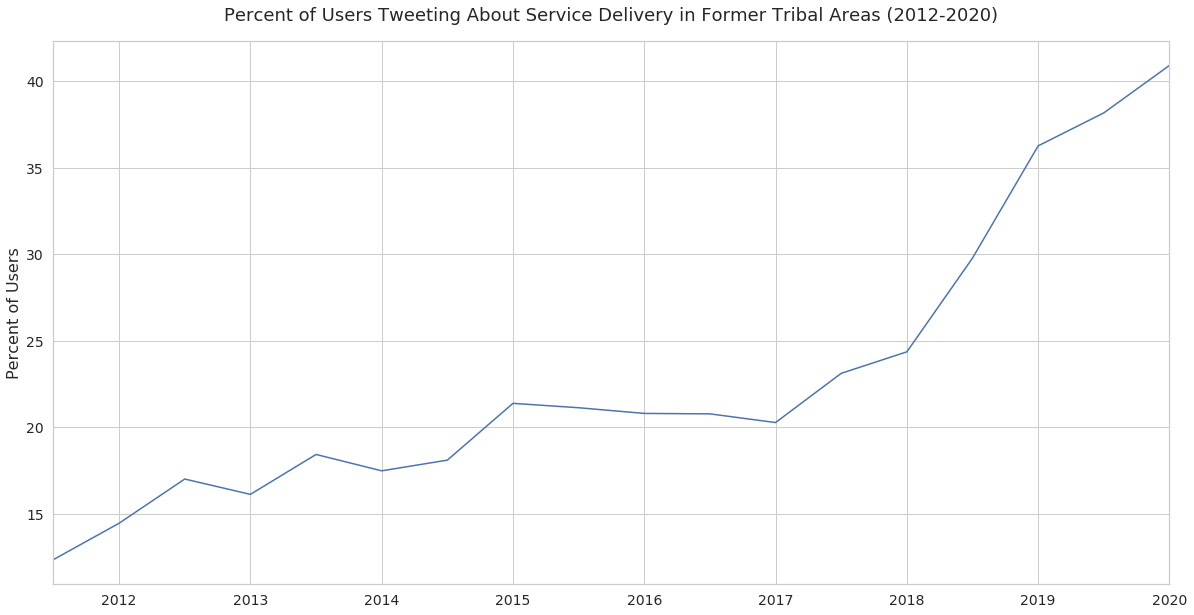

In [111]:
#Plotting percent of users over time tweeting about service delivery

axes = plot["norm"].plot(marker='', alpha=1, linestyle='-', figsize=(20, 10), subplots=False, legend = True)
axes.set_ylabel('Percent of Users', fontsize = 16)
axes.set_xlabel('',)
axes.set_title('Percent of Users Tweeting About Service Delivery in Former Tribal Areas (2012-2020)', fontsize = 18, pad=20)
axes.tick_params(axis='both', which='major', labelsize=14)
axes.legend(fontsize=14)
axes.get_legend().remove()


plt.savefig("Percent of Users Tweeting About Service Delivery in Former Tribal Areas (2012-2020)", dpi=300, bbox_inches ="tight", transparent=True)

In [132]:
#Create a df with service delivery categories and group by user location
by_location = tweets[["user_location", "agriculture_total", "development_total", "education_total", "energy_total", "food_total", "healthcare_total", "internet_total", "natural_resources_total", "sanitation_total", "water_total", "total_total"]]
by_location = by_location.groupby("user_location").sum()
by_location = by_location.reset_index()

In [136]:
#Drop locations with fewer than 25 users
by_location = by_location.drop([1, 2, 4, 5, 9, 12, 16, 17, 21, 23, 25, 28])

In [141]:
#Set index to user location and calcualte percent of tweets in each service delivery category by location
by_location = by_location.set_index("user_location")

In [142]:
by_location["agriculture_percent"] = (by_location["agriculture_total"]/by_location["total_total"]) * 100

In [143]:
by_location["development_percent"] = (by_location["development_total"]/by_location["total_total"]) * 100

In [144]:
by_location["education_percent"] = (by_location["education_total"]/by_location["total_total"]) * 100

In [145]:
by_location["energy_percent"] = (by_location["energy_total"]/by_location["total_total"]) * 100

In [146]:
by_location["food_percent"] = (by_location["food_total"]/by_location["total_total"]) * 100

In [147]:
by_location["healthcare_percent"] = (by_location["healthcare_total"]/by_location["total_total"]) * 100

In [148]:
by_location["internet_percent"] = (by_location["internet_total"]/by_location["total_total"]) * 100

In [149]:
by_location["natural_resources_percent"] = (by_location["natural_resources_total"]/by_location["total_total"]) * 100

In [150]:
by_location["sanitation_percent"] = (by_location["sanitation_total"]/by_location["total_total"]) * 100

In [151]:
by_location["water_percent"] = (by_location["water_total"]/by_location["total_total"]) * 100

In [153]:
#create dataframe of percentages of service delivery tweets by location
by_location_percent = by_location[["agriculture_percent", "development_percent", "education_percent", "energy_percent", "food_percent", "healthcare_percent", "internet_percent", "natural_resources_percent", "sanitation_percent", "water_percent"]]

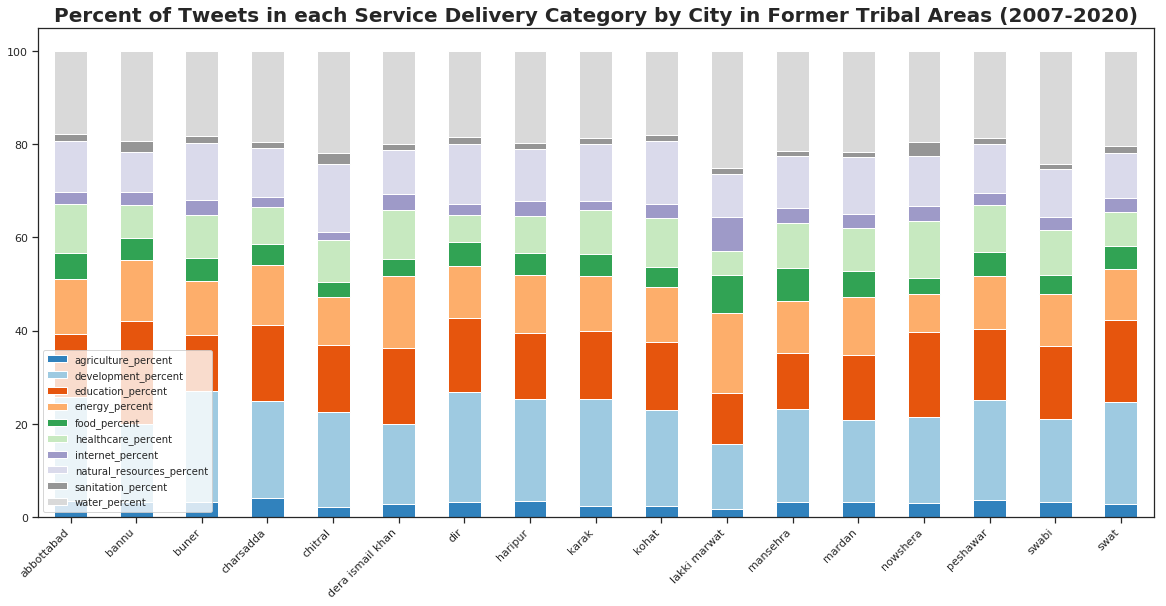

In [176]:
#Plot percentages of service delivery tweets by location

with sns.axes_style("white"):
    sns.set_style("ticks")

    fig,ax = plt.subplots(figsize=(20,10))
    data_to_plot=by_location_percent
    data_to_plot.plot(ax=ax,kind='bar', stacked=True, colormap="tab20c")
    ax.set_ylabel('',fontweight='bold', labelpad = 14, fontsize = 16)
    ax.set_xlabel('',fontweight='bold', labelpad = 14, fontsize = 20)
    ax.tick_params(which='y',direction='in',pad=3)
    ax.tick_params(which='x', labelsize=16, pad=3)
    fig.autofmt_xdate(rotation=45)
    ax.set_title("Percent of Tweets in each Service Delivery Category by City in Former Tribal Areas (2007-2020)", fontweight="bold", fontsize=20)
    plt.legend(prop={"size":10})

    plt.savefig("Percent of Twitter Users Per City Tweeting about Each Service Delivery Category in Former Tribal Areas (2007-2020)", dpi=300, bbox_inches ="tight")

In [177]:
#Count hashtag frequencies in service delivery tweets
hashtags = tweets["hashtags"].dropna()

hashtags = pd.DataFrame(hashtags)

def hashtags_only(data):
    return pd.Series(data["hashtags"].str.split(', ').sum()).value_counts()

def parallelize_dataframe(df, func, n_cores=30):
    df_split = np.array_split(df, n_cores)
    pool = Pool(n_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df

import multiprocessing 
from multiprocessing import Pool

hashtag_frequencies = parallelize_dataframe(hashtags, hashtags_only)

In [178]:
#Create a dataframe to plot and drop irrelevant observations
hashtag_df = pd.DataFrame(hashtag_frequencies)
hashtag_df = hashtag_df.head(20)
hashtag_df = hashtag_df.reset_index()
hashtag_df.loc[6,"index"] = "builddamsavepakistan"
hashtag_df = hashtag_df.drop([0,1,2,7,9,10,14,19])
hashtag_df.columns = ["hashtag", "count"]

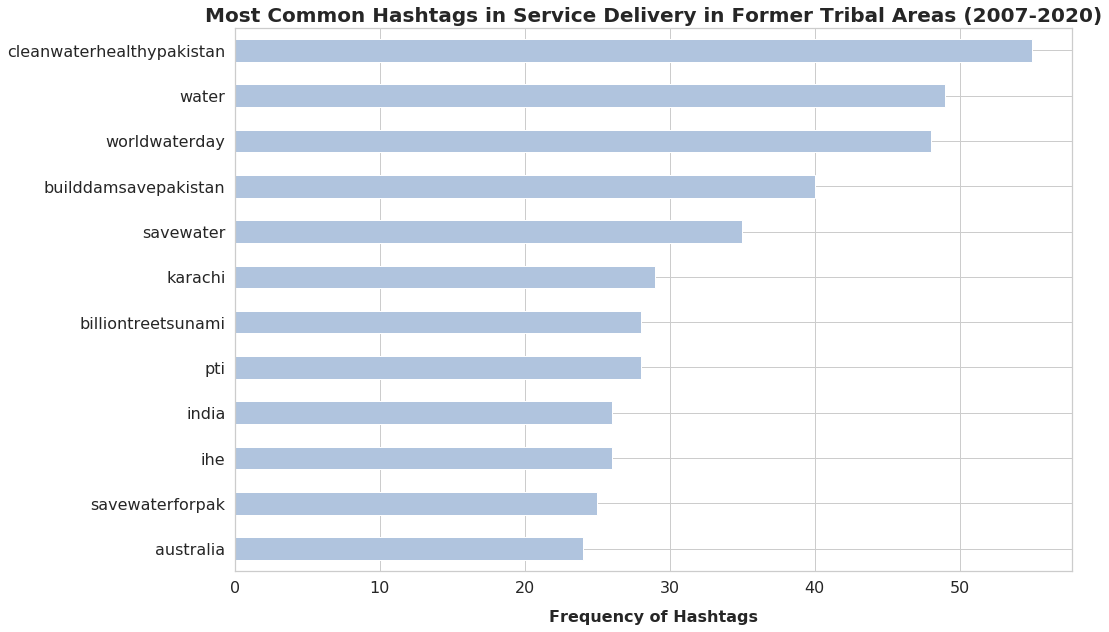

In [190]:
#Plot most common hashtags in service delivery in KP

fig, ax = plt.subplots(figsize=(15, 10))

# Plot horizontal bar graph
hashtag_df.sort_values(by='count').plot.barh(x='hashtag',
                      y='count',
                      ax=ax,
                      color="lightsteelblue")

ax.set_title("Most Common Hashtags in Service Delivery in Former Tribal Areas (2007-2020)", fontweight="bold", fontsize=20)
ax.set_ylabel('',fontweight='bold', labelpad = 14, fontsize = 16)
ax.set_xlabel('Frequency of Hashtags',fontweight='bold', labelpad = 14, fontsize = 16)
ax.tick_params(labelsize=16) 
ax.get_legend().remove()
    

plt.savefig("Most Common Hashtags in Service Delivery in Former Tribal Areas (2007-2020).pdf", dpi=300, bbox_inches ="tight")

In [198]:
#Create a dataframe of count of users by location tweeting about service delivery
df_type = tweets[["user_id", "user_location"]]
df_type = df_type.set_index(["user_location"])
df_type = df_type.groupby(["user_location"]).nunique()
df_totals = all_tweets[["user_location", "user_id"]]
df_totals = df_totals.set_index(["user_location"])
df_totals = df_totals.groupby("user_location").nunique()
df_totals = df_totals.reset_index()

In [ ]:
#Remove cities with less than 25 users
df_totals = df_totals.drop([1, 2, 4, 5, 9, 12, 16, 17, 21, 23, 25, 28])

In [199]:
#Use count dataframes to calculate percentages of users in each location tweeting about service delivery
df_totals = df_totals.set_index("user_location")
df = df_type.merge(df_totals, left_index=True, right_index=True)
df.columns = ["service delivery count", "total tweets"]
df["percent"] = (df["service delivery count"] / df["total tweets"]) * 100
percent = df[["percent"]]
percent = percent.sort_values(by='percent', ascending=False)

In [ ]:
#Plot percent of users per location tweeting about service delivery
with sns.axes_style("white"):
    sns.set_style("ticks")

    fig,ax = plt.subplots(figsize=(20,10))
    data_to_plot=percent
    data_to_plot.plot(ax=ax,kind='bar')
    ax.set_ylabel('Percent of Twitter Users',fontweight='bold', labelpad = 14, fontsize = 16)
    ax.set_xlabel('',fontweight='bold', labelpad = 14, fontsize = 16)
    ax.tick_params(which='y',direction='in',pad=3)
    ax.tick_params(which='x', labelsize=14, pad=3)
    fig.autofmt_xdate(rotation=45)
    ax.set_title("Percent of Twitter Users Per City Tweeting about Service Delivery in Former Tribal Areas (2007-2020)", fontweight="bold", fontsize=20)
    ax.get_legend().remove()
  
plt.savefig("Percent of Twitter Users Tweeting about Service Delivery in Former Tribal Areas Barchart (2007-2020)", dpi=300, bbox_inches ="tight", transparent = True)

In [380]:
#Create dataframe with percent of users tweeting about each sub-topic in service delivery in each location
df_type = df_type.reset_index()
df_type = df_type.drop(columns="index")
df_totals = df_totals.reset_index()
df = df_type.merge(df_totals, left_on="user_location", right_on="user_location")
df.columns = ["type", "user_id", "user_location", "total_users"]
result = df.groupby(['user_location', "type"]).agg({'user_id': "nunique", 
                                                     'total_users':'mean'})
result["percent users"] = (result["user_id"] / result["total_users"]) * 100

#Read dataframe to excel to transpose
result.to_excel("to_transpose.xlsx") 

In [382]:
#Load transposed dataframe
df = pd.read_excel("results_transposed.xlsx")
df = df.set_index("user_location")

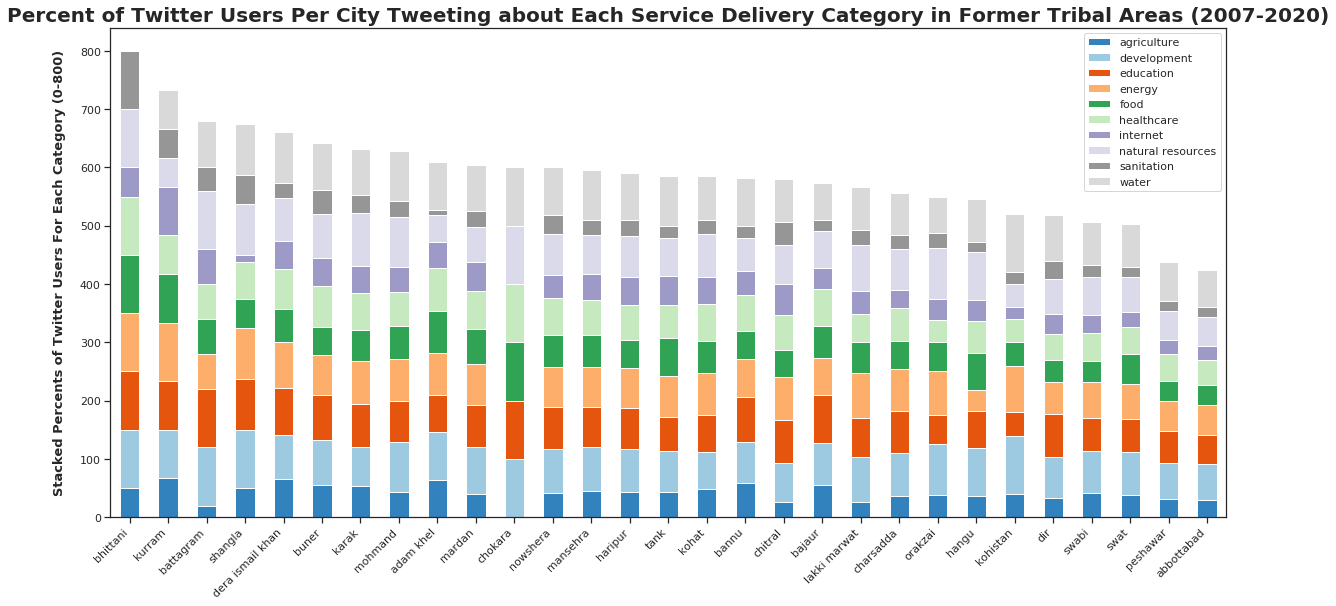

In [427]:
#Plot percent of users by location tweeting about subtopics in service delivery
with sns.axes_style("white"):
    sns.set_style("ticks")

    fig,ax = plt.subplots(figsize=(20,10))
    data_to_plot=df
    data_to_plot.plot(ax=ax,kind='bar', stacked=True, colormap="tab20c")
    ax.set_ylabel('Stacked Percents of Twitter Users For Each Category (0-800)',fontweight='bold', labelpad = 14, fontsize = 13)
    ax.set_xlabel('',fontweight='bold', labelpad = 14, fontsize = 20)
    ax.tick_params(which='y',direction='in',pad=3)
    ax.tick_params(which='x', labelsize=16, pad=3)
    fig.autofmt_xdate(rotation=45)
    ax.set_title("Percent of Twitter Users Per City Tweeting about Each Service Delivery Category in Former Tribal Areas (2007-2020)", fontweight="bold", fontsize=20)
    
    plt.savefig("Percent of Twitter Users Per City Tweeting about Each Service Delivery Category in Former Tribal Areas (2007-2020)", dpi=300, bbox_inches ="tight")